# Pymaceuticals Inc.
---

### Analysis

1. Capomulin treatments resulted in having low tumor size
2. Racine resulted in much lower tumor size than Capomulin
3. Capoulmin shows a high correlation between the weight of the mouse and the volume of its tumor
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how ="inner")

# Display the data table for preview
mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [72]:
# Checking the number of mice.
mouse_data["Mouse ID"].nunique()

249

In [73]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_data[mouse_data.duplicated(subset = ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data[mouse_data.duplicated(subset = ['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned = mouse_data[mouse_data['Mouse ID'] != duplicate[0]]
mouse_data_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [76]:
# Checking the number of mice in the clean DataFrame.
mouse_data_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_regimen = mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medi_regimen = mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_regimen = mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_regimen = mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_regimen = mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#create summary dataframe
summary_df = pd.merge(pd.merge(pd.merge(pd.merge(
    mean_regimen,medi_regimen,on = "Drug Regimen",suffixes=["_mean","_median"])
              ,var_regimen,on = "Drug Regimen")
              ,std_regimen,on = "Drug Regimen")
              ,sem_regimen,on = "Drug Regimen")

# Rename the columns
summary_df = summary_df.rename(columns = {
    "Tumor Volume (mm3)_mean" : "Mean Tumor Volume",
    "Tumor Volume (mm3)_median": "Median Tumor Volume",
    "Tumor Volume (mm3)_x" : "Tumor Volume Variance",
    "Tumor Volume (mm3)_y" : "Tumor Volume Std. Dev.",
    "Tumor Volume (mm3)" : "Tumor Volume Std. Err."
})

# Display Results
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_advance = mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean","median","var","std","sem"])

# Display Results for all treatments
summary_advance

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0, '230'),
 Text(0, 0, '178'),
 Text(0, 0, '178'),
 Text(0, 0, '188'),
 Text(0, 0, '186'),
 Text(0, 0, '181'),
 Text(0, 0, '148'),
 Text(0, 0, '228'),
 Text(0, 0, '181'),
 Text(0, 0, '182')]

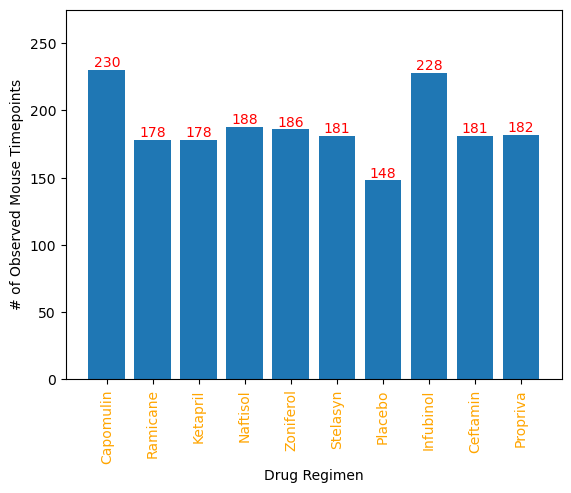

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen = mouse_data_cleaned["Drug Regimen"].value_counts()
x_axis=np.arange(0, len(regimen))
Timepoints = mouse_data_cleaned.groupby("Drug Regimen")["Timepoint"].count()
tick_locations = [value for value in x_axis]
fig, ax = plt.subplots()
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_ylim(0,275)
ax.set_xticks(tick_locations, regimen.index.values, rotation = 90, color='orange')
bars = ax.bar(x_axis, Timepoints)
ax.bar_label(bars, color = 'red')


[Text(0, 0, '230'),
 Text(0, 0, '228'),
 Text(0, 0, '188'),
 Text(0, 0, '186'),
 Text(0, 0, '182'),
 Text(0, 0, '181'),
 Text(0, 0, '181'),
 Text(0, 0, '178'),
 Text(0, 0, '178'),
 Text(0, 0, '148')]

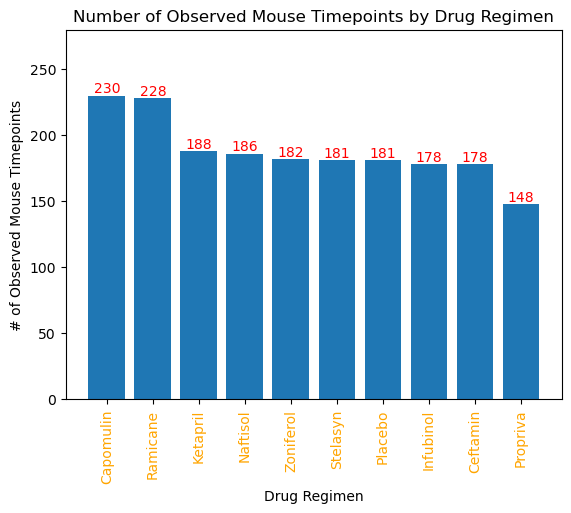

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen = mouse_data_cleaned["Drug Regimen"].value_counts()
x_axis=np.arange(0, len(regimen))
tick_locations = [value for value in x_axis]
fig, ax = plt.subplots()
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_ylim(0,max(regimen)+50)
ax.set_title("Number of Observed Mouse Timepoints by Drug Regimen")
ax.set_xticks(tick_locations, regimen.index.values, rotation = 90, color='orange')
bars = ax.bar(x_axis, regimen)
ax.bar_label(bars, color = 'red')


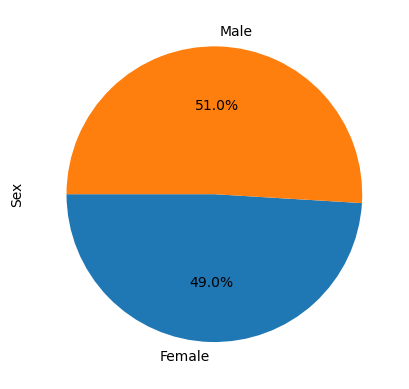

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

bar_plot = mouse_data_cleaned.groupby("Sex")["Mouse ID"].count().plot(
        kind ='pie',
        ylabel = 'Sex', autopct ="%1.1f%%", startangle = 180)


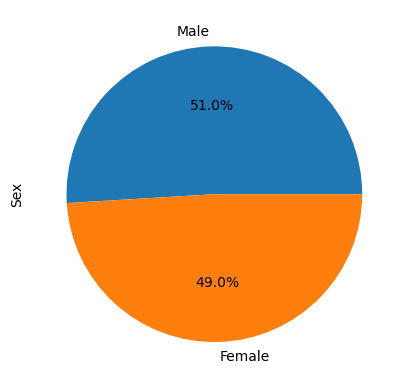

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_distribution = mouse_data_cleaned["Sex"].value_counts()

plt.pie(sex_distribution, labels = ["Male","Female"], autopct ="%1.1f%%", startangle = 0)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_data_cleaned.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint.reset_index()
#greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_data_last = pd.merge(greatest_timepoint, mouse_data_cleaned , on=["Mouse ID","Timepoint"])
mouse_data_last

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for testTreament in treatments:
    tumor_vol_df = mouse_data_last[mouse_data_last['Drug Regimen'] == testTreament]['Tumor Volume (mm3)']
    tumor_volume.append(tumor_vol_df)

    
    # calculate statisics of the treatment 
    quartiles= tumor_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    # Determine outliers using upper and lower bounds
    print(f"{testTreament}'s potential outliers: ",
         tumor_vol_df[(tumor_vol_df>upper_bound) | (tumor_vol_df<lower_bound)])  

Capomulin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:  31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


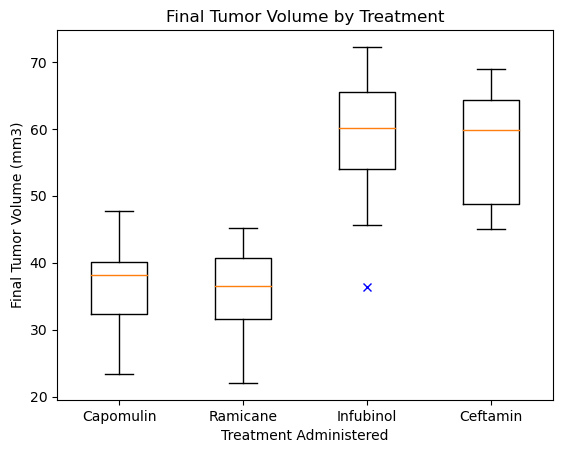

In [86]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
bp = ax1.boxplot(tumor_volume, labels=treatments, sym='bx') 

plt.title("Final Tumor Volume by Treatment") 
plt.ylabel("Final Tumor Volume (mm3)") 
plt.xlabel("Treatment Administered") 

plt.show()


## Line and Scatter Plots

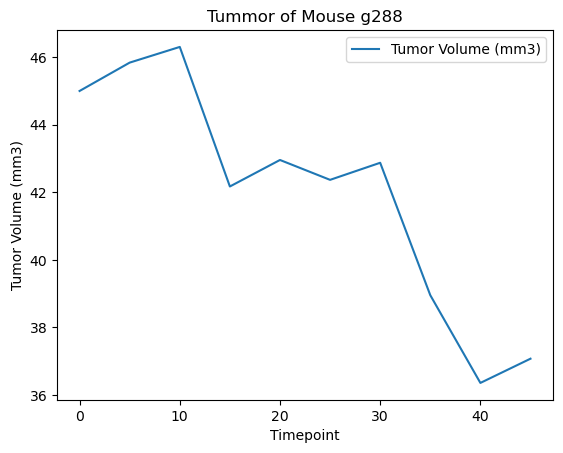

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data[mouse_data["Mouse ID"] == "g288"][["Timepoint","Tumor Volume (mm3)"]].plot(
    x="Timepoint",y="Tumor Volume (mm3)", title ="Tummor of Mouse g288", ylabel= "Tumor Volume (mm3)")

plt.show()

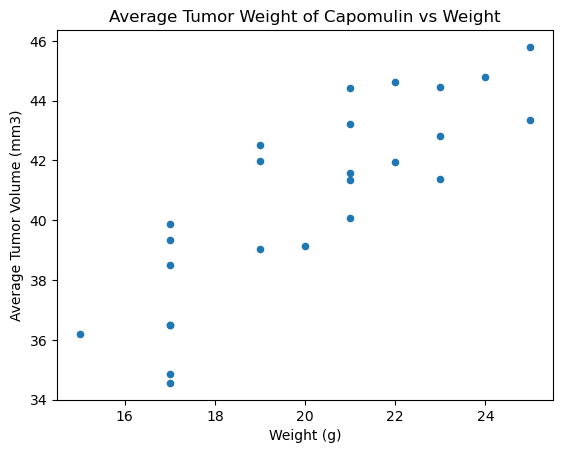

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_df = mouse_data[mouse_data["Drug Regimen"] == "Capomulin"]
mean_capomulin = Capomulin_df.groupby(['Mouse ID'])[["Weight (g)","Tumor Volume (mm3)"]].mean()

mean_capomulin.plot.scatter(x= 'Weight (g)', y= 'Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Weight of Capomulin vs Weight')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


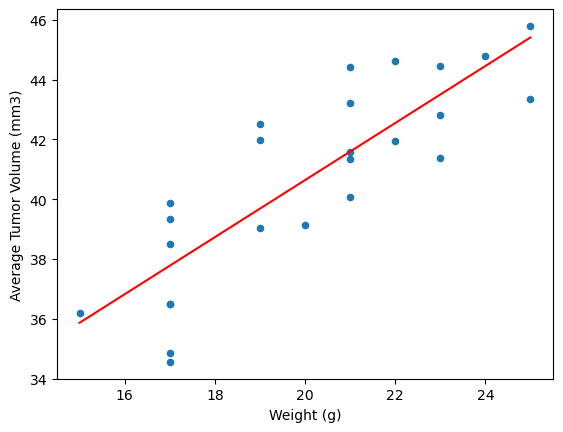

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# use scipy.stats library to calculate Pearson correlation coefficient and p-value
(r, p) = st.pearsonr(mean_capomulin['Weight (g)'],mean_capomulin['Tumor Volume (mm3)'] )

print(f"The correlation between both factors is {round(r,2)}")

x = np.arange(mean_capomulin['Weight (g)'].min(),mean_capomulin['Weight (g)'].max()+1,1)

m, b = np.polyfit(mean_capomulin['Weight (g)'],mean_capomulin['Tumor Volume (mm3)'] , deg=1)

mean_capomulin.plot.scatter(x= 'Weight (g)', y= 'Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(x, b + m * x, color ='r')

plt.show()